In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Import

In [4]:
df = pd.read_csv(r"C:\Users\hiten\Downloads\Python\Oasis Infobyte Intership\Wine Prediction\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df = df.drop('Id',axis=1)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
## As we can see there is no missing values

In [14]:
x = df.drop('quality',axis=1)
y = df['quality']

from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_transform = scaler.fit_transform(x_train)
scaled_x_transform

array([[ 0.1426802 , -1.40273053,  1.5096933 , ..., -0.09314751,
         0.56821234,  0.05661327],
       [ 0.96843134, -1.17920341,  1.5096933 , ..., -1.07474038,
         0.4477703 ,  0.89445566],
       [ 0.3786091 , -1.23508519,  0.4833938 , ...,  0.56124774,
         0.20688622,  1.26683005],
       ...,
       [-0.50612428, -1.01155806,  0.32944888, ...,  0.29948964,
        -0.33510296,  1.35992365],
       [-0.21121315,  0.21784112,  0.22681893, ..., -0.15858703,
         0.20688622, -0.87432272],
       [-0.44714205, -0.06156778,  0.6886537 , ..., -0.35490561,
        -0.09421888,  1.26683005]])

In [17]:
scaled_x_test = scaler.transform(x_test)
scaled_x_test

array([[-0.86001763,  0.44136825, -1.1586854 , ...,  0.69212679,
        -0.33510296, -0.87432272],
       [-0.8010354 ,  1.72664922, -0.28633082, ...,  1.41196156,
         0.38754928, -1.12257232],
       [-0.74205318,  0.2737229 , -0.7481656 , ...,  0.82300584,
        -1.0577552 ,  0.05661327],
       ...,
       [-0.86001763,  1.36341764, -1.3639453 , ...,  0.88844537,
        -0.57598704,  0.24280046],
       [ 1.02741357, -0.22921313, -0.3376458 , ..., -1.00930086,
         0.20688622, -1.15360352],
       [ 1.97112917, -0.3130358 ,  0.6886537 , ..., -1.59825658,
        -0.03399786, -0.37782353]])

# Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25, random_state=20)

# Importance Features

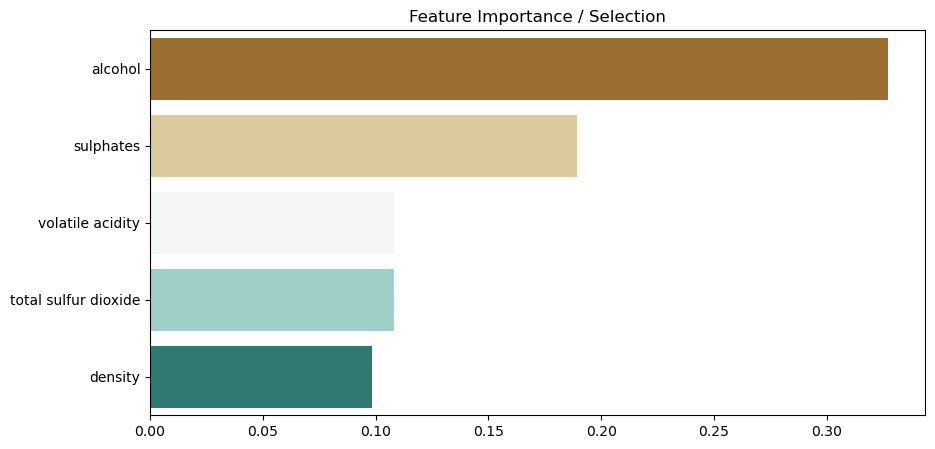

In [23]:
imp = pd.Series(data=Model.feature_importances_, index=Model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG", orient='h')

# Top 5 Variable are    
    * alcohol 
    * sulphates
    * volatile acidity
    * total sulfur dioxide
    * density


In [27]:
train = pd.concat([x_train,y_train],axis=1)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8,5
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9,5
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1,5


In [28]:
train['Predicted'] = Model.predict(x_train)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Predicted
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,6
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4,6,6
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8,5,6
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9,5,5
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1,5,5


# Model Performance

In [32]:
from sklearn.metrics import classification_report
print(classification_report(train['quality'], train['Predicted']))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        27
           5       0.69      0.77      0.73       387
           6       0.54      0.69      0.61       363
           7       0.83      0.16      0.27       117
           8       0.00      0.00      0.00        14

    accuracy                           0.62       914
   macro avg       0.34      0.27      0.27       914
weighted avg       0.61      0.62      0.58       914



# Gradient Boost Algorithms

In [34]:
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.7, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [36]:
  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import GradientBoostingClassifier 
model = GradientBoostingClassifier(random_state=10,loss="log_loss",criterion="squared_error")

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [37]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 5}


In [38]:
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.6, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=5)

# Prediction

In [40]:
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

In [41]:
train_pred

array([5, 7, 7, 5, 5, 6, 7, 5, 6, 6, 5, 7, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6,
       5, 6, 6, 5, 6, 7, 6, 5, 5, 6, 6, 7, 6, 5, 5, 5, 7, 5, 6, 6, 7, 5,
       6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 7, 6, 6,
       6, 7, 5, 6, 5, 5, 6, 6, 5, 5, 6, 7, 6, 7, 6, 6, 7, 5, 5, 5, 5, 5,
       5, 6, 5, 6, 7, 5, 5, 5, 6, 7, 5, 6, 5, 7, 5, 5, 7, 6, 5, 6, 5, 7,
       6, 6, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 5, 7, 5, 6, 5, 6, 5, 7, 6, 6,
       5, 7, 6, 6, 5, 7, 6, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 6, 5, 6, 5, 7, 5, 7, 6, 6, 6, 6, 6, 5, 7, 5, 6, 7, 5, 5, 5, 5,
       5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6, 5, 7, 6, 6,
       6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 5, 6, 6, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5,

In [42]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        27
           5       0.75      0.76      0.76       387
           6       0.63      0.73      0.68       363
           7       0.63      0.51      0.57       117
           8       1.00      0.07      0.13        14

    accuracy                           0.68       914
   macro avg       0.50      0.35      0.36       914
weighted avg       0.66      0.68      0.66       914



# Finish